<a href="https://colab.research.google.com/github/MithileshKrishnaS/Signature-Verification/blob/main/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/noiseless/train'
valid_path = '/content/drive/MyDrive/noiseless/test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/noiseless/train')
print(folders)

58900480/58889256 [==============================] - 1s 0us/step
['/content/drive/MyDrive/noiseless/train']


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(10, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/noiseless/train',
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/noiseless/test',
                                            target_size = (224, 224),
                                            batch_size = 5,
                                            class_mode = 'categorical')

Found 400 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=50,
  validation_steps=20
)

Epoch 1/25
50/50 [==============================] - 337s 7s/step - loss: 1.5849 - accuracy: 0.5825 - val_loss: 0.5077 - val_accuracy: 0.8500
Epoch 2/25
50/50 [==============================] - 255s 5s/step - loss: 0.3360 - accuracy: 0.9100 - val_loss: 0.4303 - val_accuracy: 0.9100
Epoch 3/25
50/50 [==============================] - 253s 5s/step - loss: 0.1828 - accuracy: 0.9525 - val_loss: 0.2281 - val_accuracy: 0.9300
Epoch 4/25
50/50 [==============================] - 253s 5s/step - loss: 0.1121 - accuracy: 0.9725 - val_loss: 0.3516 - val_accuracy: 0.8500
Epoch 5/25
50/50 [==============================] - 253s 5s/step - loss: 0.0714 - accuracy: 0.9875 - val_loss: 0.1973 - val_accuracy: 0.9400
Epoch 6/25
50/50 [==============================] - 253s 5s/step - loss: 0.0571 - accuracy: 0.9875 - val_loss: 0.1849 - val_accuracy: 0.9500
Epoch 7/25
50/50 [==============================] - 252s 5s/step - loss: 0.0438 - accuracy: 0.9950 - val_loss: 0.1908 - val_accuracy: 0.9500
Epoch 8/25
50

In [ ]:
model.save('/content/drive/MyDrive/VGG16/vgg.h5')

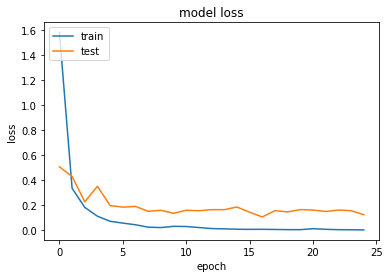

In [ ]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss.png')
plt.show()

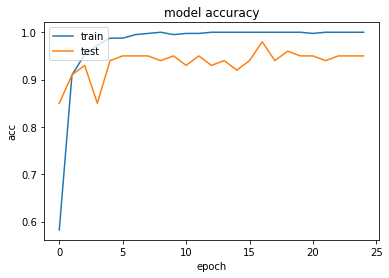

In [ ]:
# Accuracy plotting
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy.png')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
print(confusion_matrix(test_set.classes,y_pred))

[[1 1 1 2 0 0 0 0 2 3]
 [0 2 1 1 2 0 0 1 2 1]
 [1 0 1 1 1 0 4 1 0 1]
 [1 0 0 0 1 2 2 1 1 2]
 [2 1 0 1 1 3 0 0 1 1]
 [1 0 1 2 0 0 0 3 3 0]
 [1 2 2 0 1 1 2 0 1 0]
 [1 2 2 1 0 2 1 0 1 0]
 [1 1 2 0 1 1 1 1 2 0]
 [1 1 1 2 2 1 0 0 0 2]]


In [ ]:
print(classification_report(test_set.classes,y_pred))

              precision    recall  f1-score   support

           0       0.10      0.10      0.10        10
           1       0.20      0.20      0.20        10
           2       0.09      0.10      0.10        10
           3       0.00      0.00      0.00        10
           4       0.11      0.10      0.11        10
           5       0.00      0.00      0.00        10
           6       0.20      0.20      0.20        10
           7       0.00      0.00      0.00        10
           8       0.15      0.20      0.17        10
           9       0.20      0.20      0.20        10

    accuracy                           0.11       100
   macro avg       0.11      0.11      0.11       100
weighted avg       0.11      0.11      0.11       100

